<a href="https://colab.research.google.com/github/SuperSayianGodCode/ImageClassificaion/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10

In [9]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [10]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


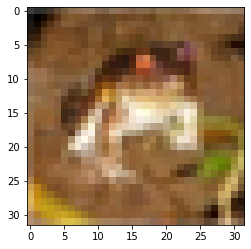

In [12]:
import matplotlib.pyplot as plt
img=plt.imshow(x_train[0])

In [13]:
print(y_train[0])

[6]


In [14]:
from keras.utils import to_categorical
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print(y_train_one_hot)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [0]:
x_train=x_train/255
y_train=y_train/255
x_test=x_test/255
y_test=y_test/255

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model=Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dense(10,activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
hist=model.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.6859 - accuracy: 0.3848 - val_loss: 1.4468 - val_accuracy: 0.4745
Epoch 2/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.3524 - accuracy: 0.5161 - val_loss: 1.2600 - val_accuracy: 0.5591
Epoch 3/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.2046 - accuracy: 0.5757 - val_loss: 1.2048 - val_accuracy: 0.5753
Epoch 4/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.1093 - accuracy: 0.6100 - val_loss: 1.1392 - val_accuracy: 0.5969
Epoch 5/10
35000/35000 [==============================] - 46s 1ms/step - loss: 1.0181 - accuracy: 0.6449 - val_loss: 1.0569 - val_accuracy: 0.6336
Epoch 6/10
35000/35000 [==============================] - 46s 1ms/step - loss: 0.9300 - accuracy: 0.6764 - val_loss: 1.0314 - val_accuracy: 0.6430
Epoch 7/10
35000/35000 [==============================] - 46s 1ms/st

In [19]:
model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 4s 436us/step


0.666700005531311

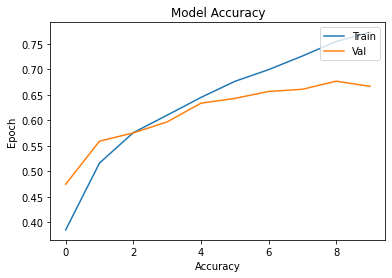

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

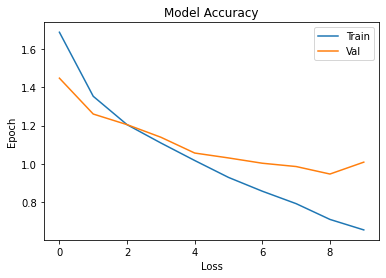

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

Saving DSC_0058.JPG to DSC_0058.JPG


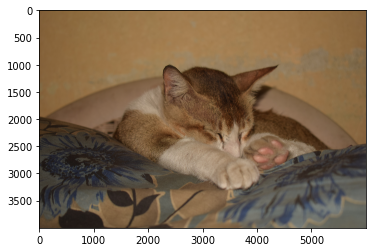

In [42]:
from google.colab import files
import glob
uploaded=files.upload()
#print(list(uploaded.keys())[0])
my_img=plt.imread(list(uploaded.keys())[0])
#print(type(uploaded))
#print(uploaded)
img=plt.imshow(my_img)

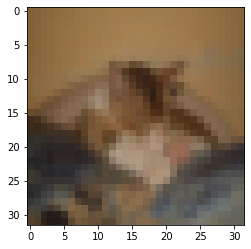

In [43]:
from skimage.transform import resize
my_img_resized=resize(my_img,(32,32,3))
img=plt.imshow(my_img_resized)

In [44]:
import numpy as np

prob=model.predict(np.array([my_img_resized,]))
print(prob)

[[2.7174582e-03 3.2336847e-04 8.4491335e-02 3.3157632e-01 2.1862663e-01
  6.0814351e-02 2.9725683e-01 2.1460955e-03 3.9691696e-04 1.6507048e-03]]


In [45]:
number_to_class=['automobile','airplane','bird','cat','deer','dog','frog','horse','ship','truck','human']
index=np.argsort(prob[0,:])
for i in range(len(index)):
  print('Most likely:',number_to_class[index[i]],'---probability:',prob[0,index[i]])
#print('Second Most likely:',number_to_class[index[8]],'---probability:',prob[0,index[8]])
#print('Third Most likely:',number_to_class[index[7]],'---probability:',prob[0,index[7]])
#print('Fourth Most likely:',number_to_class[index[6]],'---probability:',prob[0,index[6]])
#print('Five Most likely:',number_to_class[index[5]],'---probability:',prob[0,index[5]])

Most likely: airplane ---probability: 0.00032336847
Most likely: ship ---probability: 0.00039691696
Most likely: truck ---probability: 0.0016507048
Most likely: horse ---probability: 0.0021460955
Most likely: automobile ---probability: 0.0027174582
Most likely: dog ---probability: 0.06081435
Most likely: bird ---probability: 0.084491335
Most likely: deer ---probability: 0.21862663
Most likely: frog ---probability: 0.29725683
Most likely: cat ---probability: 0.33157632


In [0]:
model.save('classify_image.h5')

In [0]:
from keras.models import load_model
model=load_model('classify_image.h5')